In [197]:
import pandas as pd

import numpy as np

import os,sys


from shapely.geometry import Point, Polygon

import copy


from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score 

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

import time

In [198]:
Load_path='./Data/GAIA/'

dt='20161101'

GPS_Df=pd.read_csv(os.path.join(Load_path,'gps_'+dt+'.csv'),header=None,names=['Driver_id','Order_id',\
                                                                               'Timestamp','Longitude',\
                                                                               'Latitude'])

GPS_Df=GPS_Df.drop_duplicates(subset=['Driver_id','Order_id'])

GPS_Df=GPS_Df.reset_index(drop=True)

GPS_Df=GPS_Df[['Driver_id','Order_id']]


Order_Df=pd.read_csv(os.path.join(Load_path,'order_'+dt+'.csv'),header=None,names=['Order_id','Startstamp','Endstamp',\
                                                                                   'Pickup_Longitude','Pickup_Latitude',\
                                                                                   'Dropoff_Longitude','Dropoff_Latitude'])

Get_distance=lambda lng1,lat1,lng2,lat2:int(Point(lng1,lat1).distance(Point(lng2,lat2))*111000)

Order_Df['Duration']=Order_Df.apply(lambda x:x['Endstamp']-x['Startstamp'],axis=1)

Order_Df['Distance']=Order_Df.apply(lambda x:Get_distance(x['Pickup_Longitude'],x['Pickup_Latitude'],x['Dropoff_Longitude'],x['Dropoff_Latitude']),axis=1)

Order_Df=Order_Df[['Order_id','Startstamp','Endstamp','Duration','Distance']]




In [199]:
"""
This is to capture trips that crossover midnight.
20 The data was then cleaned by removing drivers who showed unrealistic data
trends such as having a second trip that began prior to the conclusion of the
first trip or having trips that were seen as outliers in terms of the distance,
speed or time travelled. 

"""

# Order_Df=Order_Df.loc[Order_Df['Endstamp']>Order_Df['Startstamp']]

# Order_Df=Order_Df.loc[Order_Df['Duration']<3600*2]

# Order_Df['Estimate_Duration']=Order_Df.apply(lambda x:x['Distance']/10,axis=1)

# Order_Df['Alpha']=Order_Df.apply(lambda x:max(x['Duration'],x['Estimate_Duration'])/min(x['Duration'],x['Estimate_Duration']),axis=1)

# Order_Df=Order_Df.loc[Order_Df['Alpha']<4]

# Order_Df=Order_Df[['Order_id','Startstamp','Endstamp','Duration','Distance']]





'\nThis is to capture trips that crossover midnight.\n20 The data was then cleaned by removing drivers who showed unrealistic data\ntrends such as having a second trip that began prior to the conclusion of the\nfirst trip or having trips that were seen as outliers in terms of the distance,\nspeed or time travelled. \n\n'

In [200]:
Behavior_Df=GPS_Df.merge(Order_Df,on='Order_id',how='left')

Behavior_Df=Behavior_Df.dropna()

Behavior_Df['Startstamp']=Behavior_Df['Startstamp'].astype('int32')

Behavior_Df['Endstamp']=Behavior_Df['Endstamp'].astype('int32')

Behavior_Df=Behavior_Df[['Driver_id','Order_id','Startstamp','Endstamp','Duration','Distance']]

Behavior_Df=Behavior_Df.drop_duplicates(subset=['Driver_id','Order_id'])

Behavior_Df=Behavior_Df.sort_values(by=['Driver_id','Startstamp'])

Behavior_Df=Behavior_Df.reset_index(drop=True)

Stat_Df = pd.DataFrame([])

Stat_Df['Startstamp']=Behavior_Df.groupby('Driver_id').apply(lambda x: x['Startstamp'].to_list())

Stat_Df['Endstamp']=Behavior_Df.groupby('Driver_id').apply(lambda x: x['Endstamp'].to_list())

Stat_Df['Duration']=Behavior_Df.groupby('Driver_id').apply(lambda x: x['Duration'].to_list())

Stat_Df['Distance']=Behavior_Df.groupby('Driver_id').apply(lambda x: x['Distance'].to_list())

Stat_Df['Driver_id']=Stat_Df.index

Stat_Df=Stat_Df.reset_index(drop=True)

Stat_Df=Stat_Df[['Driver_id','Startstamp','Endstamp','Duration','Distance']]

Stat_Df

,Driver_id,Startstamp,Endstamp,Duration,Distance
0,0000131d486b69eb77ab6e9e7cca9f4c,"[1477972625, 1477974785, 1477976325]","[1477973598, 1477975744, 1477978928]","[973, 959, 2603]","[4922, 6584, 2012]"
1,000211a97ba2b768ef941593bf1ae1a5,"[1477963781, 1478002015, 1478004214, 147800459...","[1477964747, 1478003305, 1478006696, 147800580...","[966, 1290, 2482, 1210, 3473]","[4914, 8153, 6219, 2748, 16536]"
2,000770ada4aa5d856b5a766fb6bf7cf1,"[1477962292, 1477968843, 1477970711, 147797185...","[1477964391, 1477969939, 1477971247, 147797244...","[2099, 1096, 536, 588, 955]","[12365, 5612, 1557, 2928, 3769]"
3,0007a380800445346fff19afc4071ce3,[1477963840],[1477965259],[1419],[5453]
4,0008c9d2ac91c00ef8b3ef80eba02a06,"[1477967006, 1477969091, 1477970229, 147798436...","[1477968116, 1477969859, 1477971080, 147798466...","[1110, 768, 851, 301, 3130, 435, 1513, 458]","[7254, 3272, 5892, 1171, 18490, 2124, 11374, 2..."
5,00095da02ea38d4d8eaa120201e38ae9,[1477965144],[1477966666],[1522],[5050]
6,000d0e4bd461b1f964daeb6d21868757,"[1477940181, 1477941311, 1477943165, 147794400...","[1477940999, 1477943122, 1477943639, 147794506...","[818, 1811, 474, 1067, 1498, 2162]","[9495, 13568, 2936, 6023, 16683, 10254]"
7,000d7d7fe559c61e98d0a51e23e69bf7,"[1477966852, 1477969912, 1477972235, 147797318...","[1477968118, 1477971602, 1477972795, 147797419...","[1266, 1690, 560, 1018, 6665, 1726, 1037, 2411]","[6400, 3610, 1713, 8103, 42110, 10901, 4844, 1..."
8,000db06fb2f4a700c4105348643f593e,[1477968693],[1477969854],[1161],[2712]
9,000f63bea1c5b36b439d6fa60ee6cac7,"[1477967652, 1477969219, 1477973870, 147797518...","[1477969086, 1477970011, 1477975048, 147797589...","[1434, 792, 1178, 703, 2442, 804, 1008, 558, 4...","[10746, 6422, 6987, 2815, 11265, 2081, 2903, 2..."


In [201]:
'''

'Total Number of Shifts', Sum

'Average Order Number', Avg

'Average Shift Duration (sec)', Avg

'Average Occupied Time (sec)', Avg

'First Shift Start Time', No

'Average Occupied Distance(m)' Avg

'''

def Get_sort(a,b,idx):

    a, b = zip(*sorted(zip(a, b)))
    
    if idx==0: 
        return list(a)
    else:  
        return list(b)

def Get_Shift(Startstamp,Endstamp,Duration,Distance):
    
    Result=list()
    
    if len(Startstamp)==1:
        
        Result.append([1,1,Duration[0],Duration[0],Startstamp[0],Distance[0]])
        
    else:
        
        s=0
        
        i=0
        
        j=1
        
        order_num=0
        
        occupied_duration=0
        
        occupied_distance=0
        
        while j<len(Startstamp):
            
            order_num+=1
                
            occupied_duration+=Duration[i]

            occupied_distance+=Distance[i]
            
            if Startstamp[j]-Endstamp[i]<3600*2:
                
                if j==len(Startstamp)-1:
                    
                    shift_duration=Endstamp[j]-Startstamp[s]
                    
                    order_num+=1
                
                    occupied_duration+=Duration[j]

                    occupied_distance+=Distance[j]
                    
                    Result.append([1,order_num,shift_duration,occupied_duration,Startstamp[s],occupied_distance])
                    
                i+=1
                
                j+=1
                
            else:
                
                shift_duration=Endstamp[i]-Startstamp[s]
                
                Result.append([1,order_num,shift_duration,occupied_duration,Startstamp[s],occupied_distance])
                
                order_num=0
                
                occupied_duration=0
                
                occupied_distance=0
                
                s=j
                
                i=j
                
                j+=1
                
    return Result
                
def explode(df, col):
    df[col] = df[col].apply(lambda x: [x] if not isinstance(x, list) else x)
    return df.drop(col, axis=1).join(
        pd.DataFrame(list(df[col])).stack().reset_index(level=1, drop=True).rename(col)
    )             
                
                
                
                
            
    
    
    
    

In [202]:
Test_Df=copy.copy(Stat_Df)


Test_Df['Transition']=Test_Df.apply(lambda x:Get_Shift(x['Startstamp'],x['Endstamp'],\
                                                      x['Duration'],x['Distance']),axis=1)

Test_Df=Test_Df[['Driver_id','Transition']]

Test_Df=explode(Test_Df,'Transition')


Cols=['Shifts', 'Order Number', 'Shift Duration (sec)', 'Occupied Time (sec)', 'Start Time', 'Occupied Distance(m)']

for i in range(len(Cols)):
    
    Test_Df[Cols[i]]=Test_Df.apply(lambda x:x['Transition'][i],axis=1)
    
    

Test_Df=Test_Df[['Driver_id', 'Shifts', 'Order Number', 'Shift Duration (sec)', 'Occupied Time (sec)', 'Start Time', 'Occupied Distance(m)']]


'''SUM'''

Sum_Df=Test_Df.groupby('Driver_id').sum()

Sum_Df['Driver_id']=Sum_Df.index

Sum_Df=Sum_Df.rename(columns={'Shifts':'Total Number of Shifts'})

Sum_Df=Sum_Df.reset_index(drop=True)

Sum_Df=Sum_Df[['Driver_id','Total Number of Shifts']]

'''Avg'''

Avg_Df=Test_Df.groupby('Driver_id').mean()

Avg_Df['Driver_id']=Avg_Df.index

Avg_Df=Avg_Df.rename(columns={'Order Number':'Average Order Number',\
                              'Shift Duration (sec)':'Average Shift Duration (sec)',\
                              'Occupied Time (sec)':'Average Occupied Time (sec)',\
                              'Occupied Distance(m)':'Average Occupied Distance(m)'})

Avg_Df=Avg_Df.reset_index(drop=True)


Avg_Df=Avg_Df[['Driver_id','Average Order Number','Average Shift Duration (sec)','Average Occupied Time (sec)','Average Occupied Distance(m)']]

'''First'''

Test_Df=Test_Df.sort_values(by=['Driver_id','Start Time'])

First_Df=Test_Df.drop_duplicates(subset=['Driver_id'],keep='first')

First_Df=First_Df[['Driver_id','Start Time']]

First_Df=First_Df.rename(columns={'Start Time':'First Shift Start Time'})

First_Df=First_Df.reset_index(drop=True)

df=Sum_Df.merge(Avg_Df,on='Driver_id')

df=df.merge(First_Df,on='Driver_id')

df=df[['Driver_id','Total Number of Shifts', 'Average Order Number',
       'Average Shift Duration (sec)', 'Average Occupied Time (sec)',
       'First Shift Start Time','Average Occupied Distance(m)']]

df
                
                
                



,Driver_id,Total Number of Shifts,Average Order Number,Average Shift Duration (sec),Average Occupied Time (sec),First Shift Start Time,Average Occupied Distance(m)
0,0000131d486b69eb77ab6e9e7cca9f4c,1,3.000000,6303.000000,4535.000000,1477972625,13518.000000
1,000211a97ba2b768ef941593bf1ae1a5,2,2.500000,3608.500000,4710.500000,1477963781,19285.000000
2,000770ada4aa5d856b5a766fb6bf7cf1,1,5.000000,11649.000000,5274.000000,1477962292,26231.000000
3,0007a380800445346fff19afc4071ce3,1,1.000000,1419.000000,1419.000000,1477963840,5453.000000
4,0008c9d2ac91c00ef8b3ef80eba02a06,3,2.666667,6323.333333,2855.333333,1477967006,17262.666667
5,00095da02ea38d4d8eaa120201e38ae9,1,1.000000,1522.000000,1522.000000,1477965144,5050.000000
6,000d0e4bd461b1f964daeb6d21868757,1,5.000000,7148.000000,5668.000000,1477940181,48705.000000
7,000d7d7fe559c61e98d0a51e23e69bf7,1,8.000000,34695.000000,16373.000000,1477966852,94039.000000
8,000db06fb2f4a700c4105348643f593e,1,1.000000,1161.000000,1161.000000,1477968693,2712.000000
9,000f63bea1c5b36b439d6fa60ee6cac7,2,5.500000,8693.000000,5495.000000,1477967652,28580.500000


**************************************************
The number of clusters:  2
0.34749347614462384
**************************************************
The number of clusters:  3
0.4222910583140748
**************************************************
The number of clusters:  4
0.41458226475834964


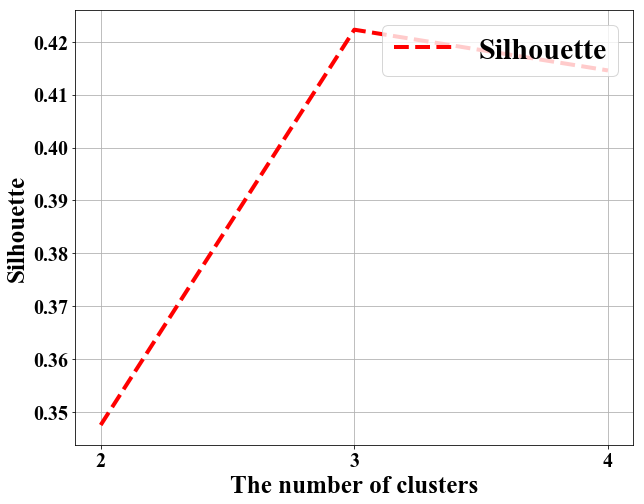

In [203]:
X=np.array(df[['Total Number of Shifts', 'Average Order Number',
       'Average Shift Duration (sec)', 'Average Occupied Time (sec)',
       'First Shift Start Time','Average Occupied Distance(m)']])
    

SSE={}

Silhouette={}

k_list=list(range(2,5,1))

for k in k_list:
    print('*'*50)
    print('The number of clusters: ',k)
    clf = KMeans(n_clusters=k)
    clf.fit(X)
    SSE[k]=clf.inertia_
    Silhouette[k]=silhouette_score(X,clf.labels_,metric='euclidean')
    
    print(Silhouette[k])

    
'''Silhouette score'''

figsize = 10,8

figure,ax1 = plt.subplots(figsize=figsize)

plt.tick_params(labelsize=20)

labels = ax1.get_xticklabels() + ax1.get_yticklabels()

[label.set_fontname('Times New Roman') for label in labels]

font = {'weight' : 'normal',\
        'family' : 'Times New Roman',\
        'size': 25}

font_legend = {'weight' : 'normal',\
        'family' : 'Times New Roman',\
        'size': 30}

ax1.plot(list(Silhouette.keys()),list(Silhouette.values()),'r--',linewidth=4,label='Silhouette')


plt.grid()

ax1.set_xlabel('The number of clusters',font)

ax1.set_ylabel('Silhouette',font)

ax1.legend(loc="upper right",prop=font_legend)

xmajorLocator   = MultipleLocator(1)

ax1.xaxis.set_major_locator(xmajorLocator) 


plt.show()



In [204]:
df=df[['Driver_id', 'Total Number of Shifts', 'Average Order Number',
       'Average Shift Duration (sec)', 'Average Occupied Time (sec)',
       'First Shift Start Time','Average Occupied Distance(m)']]



X=np.array(df[['Total Number of Shifts', 'Average Order Number',
       'Average Shift Duration (sec)', 'Average Occupied Time (sec)',
       'First Shift Start Time','Average Occupied Distance(m)']])

k=3

clf = KMeans(n_clusters=k)

clf.fit(X)

df['label']=clf.labels_

Labels=["A","B","C"]

Labels=Labels[:k]

Get_label=lambda x:Labels[x]

df['label']=df.apply(lambda x:Get_label(x['label']),axis=1)

df

,Driver_id,Total Number of Shifts,Average Order Number,Average Shift Duration (sec),Average Occupied Time (sec),First Shift Start Time,Average Occupied Distance(m),label
0,0000131d486b69eb77ab6e9e7cca9f4c,1,3.000000,6303.000000,4535.000000,1477972625,13518.000000,B
1,000211a97ba2b768ef941593bf1ae1a5,2,2.500000,3608.500000,4710.500000,1477963781,19285.000000,B
2,000770ada4aa5d856b5a766fb6bf7cf1,1,5.000000,11649.000000,5274.000000,1477962292,26231.000000,B
3,0007a380800445346fff19afc4071ce3,1,1.000000,1419.000000,1419.000000,1477963840,5453.000000,B
4,0008c9d2ac91c00ef8b3ef80eba02a06,3,2.666667,6323.333333,2855.333333,1477967006,17262.666667,B
5,00095da02ea38d4d8eaa120201e38ae9,1,1.000000,1522.000000,1522.000000,1477965144,5050.000000,B
6,000d0e4bd461b1f964daeb6d21868757,1,5.000000,7148.000000,5668.000000,1477940181,48705.000000,B
7,000d7d7fe559c61e98d0a51e23e69bf7,1,8.000000,34695.000000,16373.000000,1477966852,94039.000000,C
8,000db06fb2f4a700c4105348643f593e,1,1.000000,1161.000000,1161.000000,1477968693,2712.000000,B
9,000f63bea1c5b36b439d6fa60ee6cac7,2,5.500000,8693.000000,5495.000000,1477967652,28580.500000,B


In [205]:
def Get_hour(timestamp):

    time_local = time.localtime(timestamp)
    
    dt = time.strftime("%Y-%m-%d %H:%M:%S",time_local)
    
    return int(dt[11:13])

Stat=df.groupby('label').mean()

Get_3600=lambda x:round(x/3600.0,2)

Get_10=lambda x:round(x/10.0,2)

Stat['First Shift Start Time']=Stat.apply(lambda x:Get_hour(int(x['First Shift Start Time'])),axis=1)

Stat['First Shift Start Time (x10 hours)']=Stat.apply(lambda x:Get_10(x['First Shift Start Time']),axis=1)

Stat['Average Shift Duration (hour)']=Stat.apply(lambda x:Get_3600(x['Average Shift Duration (sec)']),axis=1)

Stat['Average Occupied Time (hour)']=Stat.apply(lambda x:Get_3600(x['Average Occupied Time (sec)']),axis=1)

Stat=Stat[['Total Number of Shifts', 'Average Order Number','Average Shift Duration (hour)',\
           'Average Occupied Time (hour)','First Shift Start Time (x10 hours)']]

Stat['label']=Stat.index

Stat

,Total Number of Shifts,Average Order Number,Average Shift Duration (hour),Average Occupied Time (hour),First Shift Start Time (x10 hours),label
label,,,,,,
A,1.130645,2.682349,1.42,0.98,1.7,A
B,1.606109,2.893159,1.58,1.02,0.7,B
C,1.202754,8.662234,5.67,3.22,1.0,C


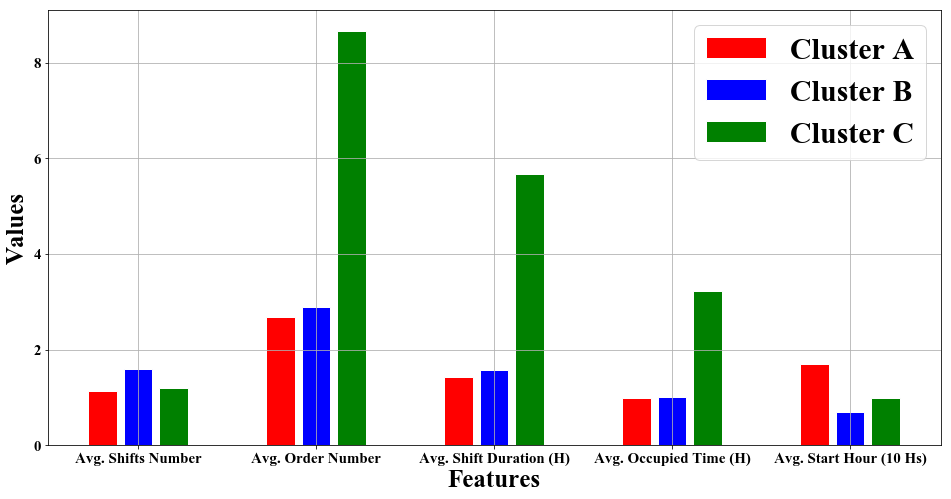

In [206]:
figsize = 16,8
figure,ax1 = plt.subplots(figsize=figsize)
font_label = {'family' : 'Times New Roman','weight' : 'normal','size': 15}
font_title = {'family' : 'Times New Roman','weight' : 'normal','size': 30}
plt.tick_params(labelsize=15)
labels = ax1.get_xticklabels() + ax1.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
font = {'family' : 'Times New Roman','weight' : 'normal','size': 25}
interval=[i for j in range(5) for i in range(10)]

coulmns=list(Stat[['Total Number of Shifts', 'Average Order Number','Average Shift Duration (hour)',\
           'Average Occupied Time (hour)','First Shift Start Time (x10 hours)']].columns)

Colors=['r','b','g']

Features=['Avg. Shifts Number','Avg. Order Number','Avg. Shift Duration (H)','Avg. Occupied Time (H)','Avg. Start Hour (10 Hs)']

for i in range(len(coulmns)):
    
    for j in range(len(Labels)):
        
        if i == len(coulmns)-1:
            
            ax1.bar(j+1+(i*5), Stat[coulmns[i]].iloc[j], label='Cluster '+Labels[j],fc = Colors[j],width = 0.8, edgecolor='white')
            
        else:
            
            ax1.bar(j+1+(i*5), Stat[coulmns[i]].iloc[j], fc = Colors[j],width = 0.8, edgecolor='white')
            
            
    
    
ax1.set_xticks(np.linspace(2,22,5))
ax1.set_xticklabels(Features)

ax1.legend(loc="upper right",prop=font_legend,numpoints=3)

ax1.set_xlabel('Features',font)
ax1.set_ylabel('Values',font)

plt.grid()
plt.show()
